### Linear Regression as building block for Supervised Learning

We're going to start the Supervised Learning session with Linear Regression (using scikit-learn).

Refresh your knowledge of linear regession methods.

1) Notes from Econometrics courses taken here at CEU (Econometrics 1 and 2)

2) Check out the Wikipedia page and also check out Andrew Ng's  lectures for free on youtube

3) Read chapter 3 in the ISLR Book



<img src="../slides/Figures/linear-regression.png">

Example that can be found in thee ISLR book.
Sales -- in thousand of units
Advertising Budget -- in thousand of dollars

"For the Advertising data, the least squares fit for the regression
of sales onto TV is shown. The fit is found by minimizing the sum of squared
errors. Each grey line segment represents an error, and the fit makes a compromise by averaging their squares."

### Step 1: Load the data

We'll be analyzing a data set consisting of house prices in Boston in the 1970s (as Mueller-Guido book/many and many oher ML tutorials with Python). The data are available in the sklearn library and we are going to load them and do some basic analysis and visualization.

In [1]:
import pandas as pd

In [2]:
!conda install scikit-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [3]:
from sklearn.datasets import load_boston

In [4]:
# Load the housing dataset
boston = load_boston()

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston_data = pd.DataFrame(boston.data, columns = boston.feature_names)

In [7]:
boston_data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [8]:
boston_data['Price'] = boston.target

In [9]:
boston_data.tail(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


### Step 2: Visualizing current data

<AxesSubplot:>

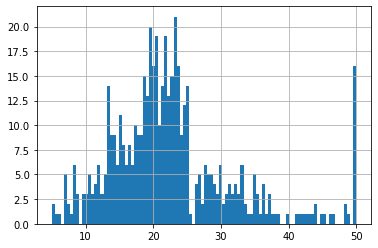

In [10]:
#Let's plot using the pandas built in visualization tools
boston_data.Price.hist(bins = 100)

Text(0, 0.5, 'Number of houses for each price bin')

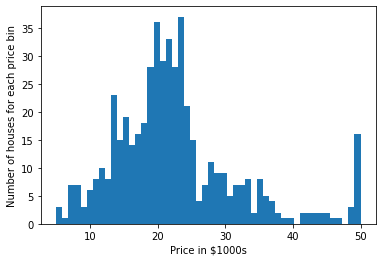

In [11]:
#Alternatively we can do this with Matplotlib
import matplotlib.pyplot as plt
plt.hist(boston_data['Price'], bins = 50)
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses for each price bin')
#plt.savefig('Outputs/Histogram_Price.png')

Text(0, 0.5, 'Number of houses for each price bin')

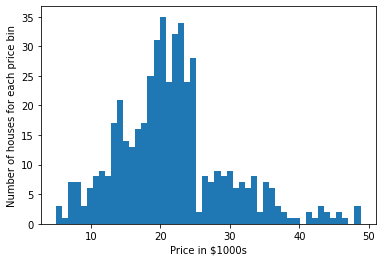

In [12]:
#Abay's solution
import matplotlib.pyplot as plt
plt.hist(boston_data[boston_data['Price']<50]['Price'], bins = 50)
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses for each price bin')


Text(0, 0.5, 'Number of houses for each price bin')

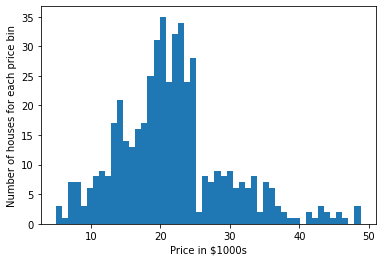

In [13]:
#Marton's solution
boston_data_below50 = boston_data.loc[boston_data['Price'] < 50]
plt.hist(boston_data_below50['Price'], bins = 50)
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses for each price bin')


In [14]:
boston_data_below50.shape

(490, 14)

Text(0.5, 0, 'Number of rooms')

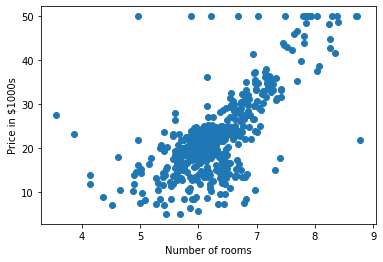

In [15]:
# Correlations between number of rooms and prices
plt.scatter(boston_data['RM'], boston_data['Price'])
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')
#plt.savefig('Outputs/Corr_Price_Rooms.png')

In [38]:
boston_data[['RM']]

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


### Challenge: Describe the type of relationship you observe in the plot above.

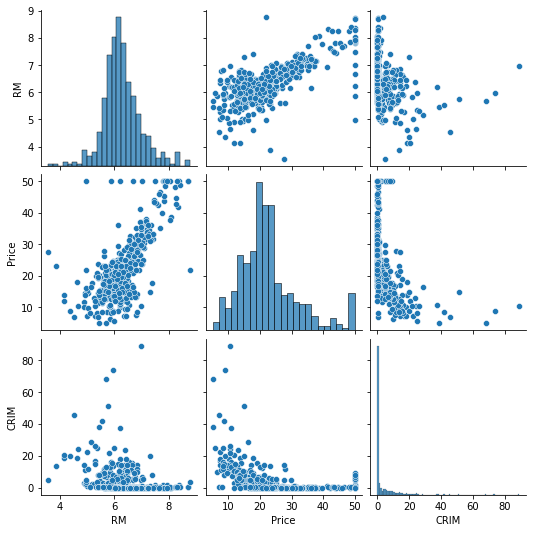

In [16]:
import seaborn as sns
sns.pairplot(boston_data[['RM', 'Price', 'CRIM']])

In [17]:
boston_data[['RM', 'Price', 'CRIM']].describe()

,RM,Price,CRIM
count,506.000000,506.000000,506.000000
mean,6.284634,22.532806,3.613524
std,0.702617,9.197104,8.601545
min,3.561000,5.000000,0.006320
25%,5.885500,17.025000,0.082045
50%,6.208500,21.200000,0.256510
75%,6.623500,25.000000,3.677083
max,8.780000,50.000000,88.976200


### Challenge: Use pairplot method to plot three variables (features) of your own choice.

In scikit-learn, all estimators implement the `fit()` and `predict()` methods. The former is used to learn the parameters of a model, and the latter is used to predict the value of a response variable for an explanatory variable using the learned parameters. It is easy to experiment with different models using scikit-learn because all estimators implement the fit and predict methods.

In [18]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

We are going to perform out of sample validation. The training set is implemented to build up the model that best predicts the outcome. The validation set is used to validate the model(s). Observations in the training set are excluded from the validation set. The correct way to pick out which observations from your dataset to be part either the training or validation (also called test) set is randomly.

Scikit helps us with `train_test_split`.

The parameters passed are your features and outcome. We can also specify the fraction of observations we leave out as a test set. Remind to set the seed, using `random_state` to replicate your own results. 

<img src="../slides/Figures/train-test-split.png">

<img src="../slides/Figures/overfitting.png">

In [19]:
# Data Columns
X = boston_data.drop('Price', 1)

# Target
y = boston_data.Price

<ipython-input-19-424fc969e800>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = boston_data.drop('Price', 1)


In [20]:
X.shape

(506, 13)

In [21]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [22]:
y.shape

(506,)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [25]:
# Implement Linear Regression
reg.fit(X_train, y_train)

LinearRegression()

In [26]:
#Get the intercept
reg.intercept_

30.246750993923865

In [27]:
#Get the coefficients
reg.coef_

array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
       -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
        2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
       -5.08571424e-01])

In [28]:
#aGet coefficients and set them to a dataframe
estimated_coeff = pd.DataFrame(reg.coef_, X.columns, columns = ['Features'])

In [29]:
estimated_coeff

,Features
CRIM,-0.113056
ZN,0.030110
INDUS,0.040381
CHAS,2.784438
NOX,-17.202633
RM,4.438835
AGE,-0.006296
DIS,-1.447865
RAD,0.262430
TAX,-0.010647


We want to check correctedness of our model using the testing data. We do so by using the predict method.

In [30]:
yhat_train = reg.predict(X_train)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

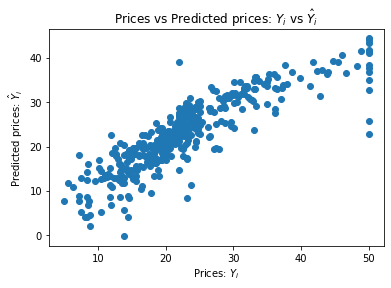

In [31]:
#Plot true outcomes (target) and predicted values from our model

plt.scatter(y_train, yhat_train)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

### Residual Plot

Let's check the residual plot to see if we are doing a good job. If we are doing a decent job, we don't expect the residual plot to display patters. If we, instead, observe some patterns i.e residuals are larger for higher prices we have heteroskedasticity in the data and we have to take care of this. If dealing with prices think about log-transformation of the data. Prices are usually log-normally distributed with longer right tail.

In [32]:
residuals_train = y_train - yhat_train

Text(0.5, 1.0, 'Residuals training set')

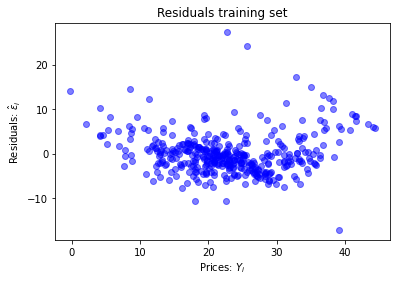

In [33]:
plt.scatter(yhat_train, residuals_train, c = 'b', alpha = 0.5)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Residuals: $\hat{\epsilon}_i$")
plt.title("Residuals training set")

### Challenge: Plot the residuals for the test set against y_test as above. What other type of plot can we use?

### Model evaluation

We want to quantify the extent to which the model fits the data. The quality of a linear regression fit is typically assessed
using two related quantities: the root mean squared error (RMSE) and the R2 statistic. Sklearn helps us again.

In [34]:
#R2
print ("Training set score: {:.2f}".format(reg.score(X_train , y_train ))) 
print ( "Test set score: {:.2f}".format(reg.score(X_test , y_test))) 

Training set score: 0.75
Test set score: 0.67


In [35]:
reg.coef_

array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
       -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
        2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
       -5.08571424e-01])

### Challenge: What is the R2 saying? Do you think the RMSE will provide a different answer than the R2? Use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html"> MSE from Sklearn</a> to aswer this question.

### Challenge: Use a scaled measure of the outcome variable. How does R2 and RMSE change?

### References
https://scikit-learn.org/stable/modules/linear_model.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://towardsdatascience.com/heteroscedasticity-is-nothing-to-be-afraid-of-730dd3f7ca1f

https://nbviewer.jupyter.org/github/jmportilla/Udemy---Machine-Learning/blob/master/Supervised%20Learning%20-%20%20Linear%20Regression.ipynb